Shape del dataset: (973, 16)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Log_Age
0,1.422343,1,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,3,-1.978321,1.455967,0.743295,1.609784,0.793855,1.234394
1,0.600965,0,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1,1.426301,-0.877898,0.743295,0.257176,1.064064,0.663886
2,-0.548964,0,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,0,1.346380,-0.544488,0.743295,0.257176,-0.029880,-0.388630
3,-1.123928,1,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,2,0.611110,-0.877898,-0.352502,-1.095432,-0.976934,-1.104586
4,-0.056137,1,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,2,0.675047,0.289035,-0.352502,-1.095432,-1.580838,0.109778


Train size: (778, 15), Test size: (195, 15)

--- Linear Regression ---
MAE: 0.5154030361716071
MSE: 0.3801235592559777
RMSE: 0.6165416119419497
R2 Score: 0.6246058769520341

--- Random Forest ---
MAE: 0.3795175842967837
MSE: 0.20087019655893704
RMSE: 0.4481854488478369
R2 Score: 0.8016289981307468

Cross-validation R2 scores: [0.80357572 0.75536808 0.81109801 0.80258293 0.79165287]
Mean CV R2: 0.7928555200046137


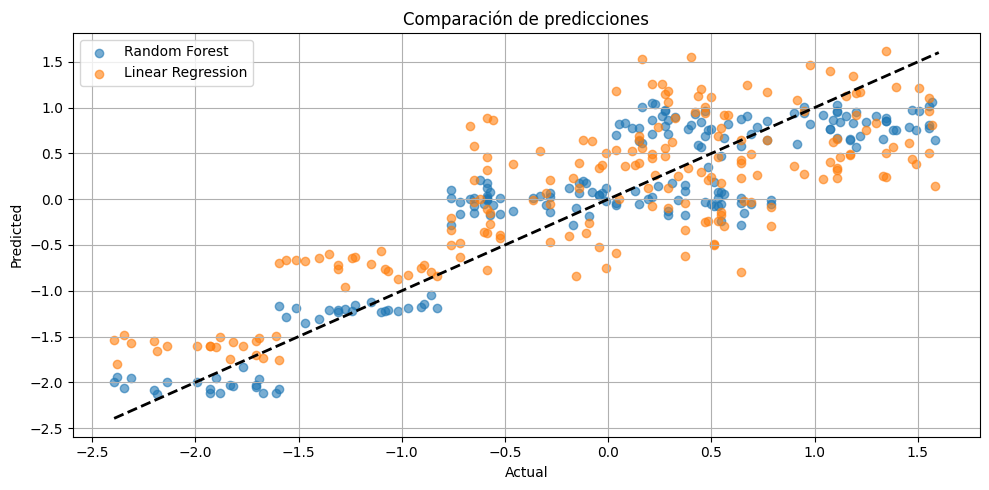

In [1]:
# 🔹 1. Importaciones necesarias
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===============================
# 🔹 2. Cargar datos preprocesados
# ===============================
df = pd.read_csv('data/processed/preprocessed_data.csv')
print(f"Shape del dataset: {df.shape}")
display(df.head())

# ===============================
# 🔹 3. Definir X (features) e y (target)
# ===============================
# Asegúrate de que 'Fat Percentage' existe como columna.
target_col = 'Fat_Percentage'  
if target_col not in df.columns:
    raise ValueError(f"La columna objetivo '{target_col}' no está en el dataframe.")

X = df.drop(columns=[target_col])
y = df[target_col]

# ===============================
# 🔹 4. División de datos
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# ===============================
# 🔹 5. Entrenamiento de modelos base
# ===============================

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ===============================
# 🔹 6. Evaluación de modelos
# ===============================
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ===============================
# 🔹 7. Validación cruzada (opcional)
# ===============================
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("\nCross-validation R2 scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))

# ===============================
# 🔹 8. Comparación visual de predicciones
# ===============================
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Comparación de predicciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
